In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import ETFs as etfs

Total number of ETFs: 33


In [2]:
data = pd.read_csv('assets_final.csv', parse_dates=['Date'])
print(data.columns.tolist())
data.set_index('Date', inplace=True)
display(data)


['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume']


,Ticker,Close,High,Low,Open,Volume
Date,,,,,,
2012-01-03,CORN,42.619999,42.990002,42.180000,42.730000,114100.0
2012-01-03,DBO,26.042212,26.094875,25.770116,25.796447,318300.0
2012-01-03,EWA,12.307327,12.368641,12.234866,12.240439,2787500.0
2012-01-03,EWC,20.625568,20.648152,20.384686,20.437379,6790400.0
2012-01-03,EWG,14.720881,14.838238,14.706212,14.742886,3892700.0
...,...,...,...,...,...,...
2025-03-28,VDNR.L,136.095001,138.505005,136.065002,137.910004,31820.0
2025-03-28,VGK,70.980003,71.260002,70.820000,71.190002,6081100.0
2025-03-28,VNQ,89.709999,90.279999,89.129997,90.120003,3602900.0


In [3]:
data_close = data[['Ticker', 'Close']].copy()
# data_close[data_close['Ticker'] == 'SPY']['Close'].plot()
data_close['Yesterday'] = data_close.groupby('Ticker')['Close'].shift(1)
data_close['Target'] = (data_close['Close'] > data_close['Yesterday']).astype(int)
# data_close.dropna(inplace=True)
display(data_close[data_close['Ticker'] == 'SPY'])


,Ticker,Close,Yesterday,Target
Date,,,,
2012-01-03,SPY,100.450691,NaN,0
2012-01-04,SPY,100.608231,100.450691,1
2012-01-05,SPY,100.876106,100.608231,1
2012-01-06,SPY,100.616119,100.876106,0
2012-01-09,SPY,100.860359,100.616119,1
...,...,...,...,...
2025-03-24,SPY,574.080017,563.979980,1
2025-03-25,SPY,575.460022,574.080017,1
2025-03-26,SPY,568.590027,575.460022,0


## Change the dataframe pivot as the columns are each ticker's closing prices

In [4]:
close_wide = data_close.pivot(columns='Ticker', values='Close')
close_wide = close_wide.fillna(-1)
display(close_wide)

Ticker,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,-1.000000,-1.000,-1.000000,42.619999,26.042212,-1.000000,-1.000000,12.307327,20.625568,14.720881,...,28.830000,100.450691,84.200859,317.519989,69.905647,-1.000000,27.664726,34.591934,33.707794,6.78375
2012-01-04,-1.000000,-1.000,-1.000000,42.509998,26.165094,-1.000000,-1.000000,12.452250,20.587934,14.581522,...,28.389999,100.608231,83.199745,318.160004,70.114937,-1.000000,27.328682,34.000534,33.888035,6.69750
2012-01-05,-1.000000,-1.000,-1.000000,41.509998,25.814003,-1.000000,-1.000000,12.290603,20.459965,14.412819,...,28.510000,100.876106,83.051743,313.359985,69.817871,-1.000000,26.831091,34.319893,33.472141,6.68250
2012-01-06,-1.000000,-1.000,-1.000000,41.349998,25.919333,-1.000000,-1.000000,12.128960,20.249189,14.148771,...,27.910000,100.616119,83.707436,313.760010,69.392525,-1.000000,26.462751,34.207516,33.070114,6.72625
2012-01-09,-1.000000,-1.000,-1.000000,42.189999,25.831560,-1.000000,-1.000000,12.167979,20.309414,14.207447,...,28.129999,100.860359,83.559319,312.640015,69.655838,-1.000000,26.663076,34.089245,33.097847,6.69625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,38.276001,10.405,100.550003,18.930000,14.140000,107.930000,56.490002,23.700001,41.509998,38.029999,...,29.959999,574.080017,89.120590,74.879997,129.030991,140.270004,71.730003,90.728004,74.690002,8.28750
2025-03-25,38.380001,10.440,100.720001,18.770000,14.030000,107.330002,56.580002,23.809999,41.709999,38.380001,...,30.580000,575.460022,89.110664,74.820000,129.460007,140.479996,72.160004,89.709999,75.089996,8.14875
2025-03-26,37.854000,10.400,98.169998,18.559999,14.110000,105.839996,56.080002,23.709999,41.380001,37.560001,...,30.530001,568.590027,88.524925,75.419998,130.250000,139.595001,71.139999,90.059998,74.410004,8.14500


In [5]:
target_wide = (close_wide > close_wide.shift(1)).astype(int)
display(target_wide)

Ticker,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-04,0,0,0,0,1,0,0,1,0,0,...,0,1,0,1,1,0,0,0,1,0
2012-01-05,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2012-01-06,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2012-01-09,0,0,0,1,0,0,0,1,1,1,...,1,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,1,1,1,1,1,0,1,1,1,0,...,0,1,0,1,1,1,0,1,1,0
2025-03-25,1,1,1,0,0,0,1,1,1,1,...,1,1,0,0,1,1,1,0,1,0
2025-03-26,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [6]:
test_df = pd.DataFrame({'Close_yesterday': close_wide['SPY'].shift(1),'Close Tody':close_wide['SPY'],'Target': target_wide['SPY']})
display(test_df)

,Close_yesterday,Close Tody,Target
Date,,,
2012-01-03,NaN,100.450691,0
2012-01-04,100.450691,100.608231,1
2012-01-05,100.608231,100.876106,1
2012-01-06,100.876106,100.616119,0
2012-01-09,100.616119,100.860359,1
...,...,...,...
2025-03-24,563.979980,574.080017,1
2025-03-25,574.080017,575.460022,1
2025-03-26,575.460022,568.590027,0


In [7]:
close_wide = close_wide.iloc[1:]
target_wide = target_wide.iloc[1:]

display(close_wide)
display(target_wide)

Ticker,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-1.000000,-1.000,-1.000000,42.509998,26.165094,-1.000000,-1.000000,12.452250,20.587934,14.581522,...,28.389999,100.608231,83.199745,318.160004,70.114937,-1.000000,27.328682,34.000534,33.888035,6.69750
2012-01-05,-1.000000,-1.000,-1.000000,41.509998,25.814003,-1.000000,-1.000000,12.290603,20.459965,14.412819,...,28.510000,100.876106,83.051743,313.359985,69.817871,-1.000000,26.831091,34.319893,33.472141,6.68250
2012-01-06,-1.000000,-1.000,-1.000000,41.349998,25.919333,-1.000000,-1.000000,12.128960,20.249189,14.148771,...,27.910000,100.616119,83.707436,313.760010,69.392525,-1.000000,26.462751,34.207516,33.070114,6.72625
2012-01-09,-1.000000,-1.000,-1.000000,42.189999,25.831560,-1.000000,-1.000000,12.167979,20.309414,14.207447,...,28.129999,100.860359,83.559319,312.640015,69.655838,-1.000000,26.663076,34.089245,33.097847,6.69625
2012-01-10,-1.000000,-1.000,-1.000000,42.049999,25.963219,-1.000000,-1.000000,12.402084,20.572878,14.464166,...,29.049999,101.734856,83.418289,314.720001,70.256721,-1.000000,27.070204,34.467747,33.610767,6.81750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,38.276001,10.405,100.550003,18.930000,14.140000,107.930000,56.490002,23.700001,41.509998,38.029999,...,29.959999,574.080017,89.120590,74.879997,129.030991,140.270004,71.730003,90.728004,74.690002,8.28750
2025-03-25,38.380001,10.440,100.720001,18.770000,14.030000,107.330002,56.580002,23.809999,41.709999,38.380001,...,30.580000,575.460022,89.110664,74.820000,129.460007,140.479996,72.160004,89.709999,75.089996,8.14875
2025-03-26,37.854000,10.400,98.169998,18.559999,14.110000,105.839996,56.080002,23.709999,41.380001,37.560001,...,30.530001,568.590027,88.524925,75.419998,130.250000,139.595001,71.139999,90.059998,74.410004,8.14500


Ticker,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,0,0,0,0,1,0,0,1,0,0,...,0,1,0,1,1,0,0,0,1,0
2012-01-05,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2012-01-06,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2012-01-09,0,0,0,1,0,0,0,1,1,1,...,1,1,0,0,1,0,1,0,1,0
2012-01-10,0,0,0,0,1,0,0,1,1,1,...,1,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,1,1,1,1,1,0,1,1,1,0,...,0,1,0,1,1,1,0,1,1,0
2025-03-25,1,1,1,0,0,0,1,1,1,1,...,1,1,0,0,1,1,1,0,1,0
2025-03-26,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [8]:
first_prices = close_wide.apply(
    lambda col: col[col != -1].iloc[0] if (col != -1).any() else np.nan
)
first_prices_df = first_prices.to_frame().T
first_prices_df.index = ['First Price']  
display(first_prices_df)


normalized_close = close_wide / first_prices

normalized_close = normalized_close.mask(close_wide < 0, -1) 
normalized_array = normalized_close.to_numpy(dtype='float32')
print(f"normalized_array.shape {normalized_array.shape}")
print(f"normalized_array {normalized_array}")
display(normalized_close)

Ticker,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
First Price,21.902437,6.246624,40.0,42.509998,26.165094,22.380075,42.757004,12.45225,20.587934,14.581522,...,28.389999,100.608231,83.199745,318.160004,70.114937,42.300953,27.328682,34.000534,33.888035,6.6975


normalized_array.shape (3407, 33)
normalized_array [[-1.         -1.         -1.         ...  1.          1.
   1.        ]
 [-1.         -1.         -1.         ...  1.0093927   0.9877274
   0.9977603 ]
 [-1.         -1.         -1.         ...  1.0060875   0.97586405
   1.0042926 ]
 ...
 [ 1.7283008   1.6648991   2.4542499  ...  2.6487818   2.1957603
   1.2161255 ]
 [ 1.7193521   1.6745044   2.427      ...  2.6420174   2.1933997
   1.2030607 ]
 [ 1.682233    1.6552941   2.317875   ...  2.638488    2.1541526
   1.2099664 ]]


Ticker,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000
2012-01-05,-1.000000,-1.000000,-1.000000,0.976476,0.986582,-1.000000,-1.000000,0.987019,0.993784,0.988430,...,1.004227,1.002663,0.998221,0.984913,0.995763,-1.000000,0.981792,1.009393,0.987727,0.997760
2012-01-06,-1.000000,-1.000000,-1.000000,0.972712,0.990607,-1.000000,-1.000000,0.974038,0.983546,0.970322,...,0.983093,1.000078,1.006102,0.986170,0.989697,-1.000000,0.968314,1.006088,0.975864,1.004293
2012-01-09,-1.000000,-1.000000,-1.000000,0.992472,0.987253,-1.000000,-1.000000,0.977171,0.986472,0.974346,...,0.990842,1.002506,1.004322,0.982650,0.993452,-1.000000,0.975644,1.002609,0.976682,0.999813
2012-01-10,-1.000000,-1.000000,-1.000000,0.989179,0.992285,-1.000000,-1.000000,0.995971,0.999269,0.991952,...,1.023248,1.011198,1.002627,0.989188,1.002022,-1.000000,0.990542,1.013741,0.991818,1.017917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,1.747568,1.665700,2.513750,0.445307,0.540415,4.822593,1.321187,1.903270,2.016229,2.608095,...,1.055301,5.706094,1.071164,0.235353,1.840278,3.316001,2.624715,2.668429,2.204023,1.237402
2025-03-25,1.752316,1.671303,2.518000,0.441543,0.536211,4.795784,1.323292,1.912104,2.025944,2.632098,...,1.077140,5.719811,1.071045,0.235165,1.846397,3.320965,2.640449,2.638488,2.215826,1.216685
2025-03-26,1.728301,1.664899,2.454250,0.436603,0.539268,4.729206,1.311598,1.904073,2.009915,2.575863,...,1.075379,5.651526,1.064005,0.237051,1.857664,3.300044,2.603126,2.648782,2.195760,1.216125


In [9]:
# def create_X_y(data, window_size):
#     X, y = [], []
#     for i in range(len(data) - window_size):
#         X.append(data[i : i + window_size])
#         y.append(data[i + window_size])
#     return np.array(X), np.array(y)

def create_X_y(feature, target, window_size):
    X, y = [], []
    for i in range(window_size, len(feature) - 1):
        X.append(feature.iloc[i-window_size:i].values.flatten()) 
    for i in range(window_size, len(target) - 1):
        y.append(target.iloc[i+1].values) 
    X = np.array(X)
    y = np.array(y)
    return X, y


window_size = 30
target_wide_array = target_wide.to_numpy(dtype='float32')
display(normalized_close.shape)
display(target_wide_array.shape)
X, y = create_X_y(pd.DataFrame(normalized_close), pd.DataFrame(target_wide_array), window_size)
print(X.shape)
print(y.shape)
display(X)

(3407, 33)

(3407, 33)

(3376, 990)
(3376, 33)


array([[-1.        , -1.        , -1.        , ...,  1.07879605,
         1.05358953,  1.1584546 ],
       [-1.        , -1.        , -1.        , ...,  1.07236008,
         1.06299827,  1.15117578],
       [-1.        , -1.        , -1.        , ...,  1.08366622,
         1.07118014,  1.13531168],
       ...,
       [ 1.88207366,  1.63793312,  2.85      , ...,  2.6684288 ,
         2.20402283,  1.23740203],
       [ 1.87718843,  1.6493956 ,  2.82549992, ...,  2.63848794,
         2.21582623,  1.21668533],
       [ 1.9193297 ,  1.64109522,  2.88649998, ...,  2.64878185,
         2.19576036,  1.21612545]])

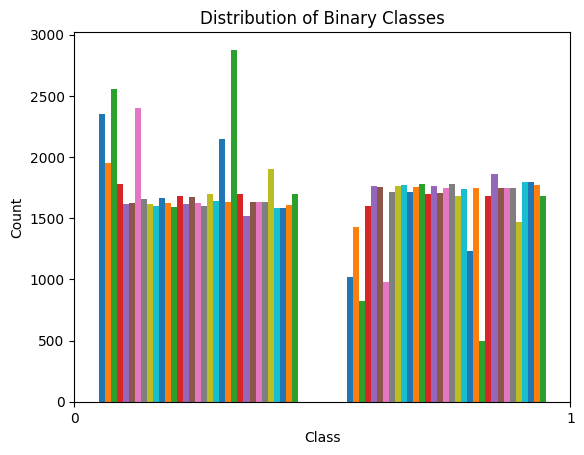

In [10]:
plt.hist(y, bins=2, rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Binary Classes')
plt.show()

In [11]:
dataset_size = len(X)
print(f"dataset_size: {dataset_size}")
train_size = int(dataset_size * 0.8)
val_size = dataset_size - train_size  - 1
test_size = 1

print(f"train_size: {train_size}, val_size: {val_size}, test_size: {test_size}")
print(f"dataset_size: {dataset_size}, window_size: {window_size}")

X_train, X_val, X_test = X[:train_size], X[train_size: train_size + val_size], X[train_size + val_size: ]
y_train, y_val, y_test= y[:train_size], y[train_size: train_size + val_size], y[train_size + val_size: ]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape


dataset_size: 3376
train_size: 2700, val_size: 675, test_size: 1
dataset_size: 3376, window_size: 30


((2700, 990), (2700, 33), (675, 990), (675, 33), (1, 990), (1, 33))

In [12]:
rf = MultiOutputClassifier(
    RandomForestClassifier(
        n_jobs=-1,             
        random_state=42
    )
)
rf.fit(X_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(n_jobs=-1,
                                                       random_state=42))

In [13]:
print(np.unique(y_train))
# Should output: [0 1]
Y_pred = rf.predict(X_test)
print(np.unique(Y_pred))

# Y_pred = (Y_pred > 0.5).astype(int)
y_pred_df = pd.DataFrame(Y_pred, columns=target_wide.columns)

display(y_pred_df)

[0. 1.]
[0. 1.]


Ticker,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [14]:
yesterday_prices = close_wide.iloc[-2]  # second last row 

today_prices_actual = close_wide.iloc[-1] # last row

today_taget_predicted = pd.Series(Y_pred.flatten(), index=target_wide.columns)

today_target_true = target_wide.iloc[-1] 

comparison_df = pd.DataFrame({
    'Yesterday_actual': yesterday_prices,
    'Today_actual': today_prices_actual,
    'Today_actual_target': today_target_true,
    'Today_pred_target': today_taget_predicted,
})

tickers_names = target_wide.columns

correct_list = []
for ticker in tickers_names:
    predict = today_taget_predicted[ticker]
    actual = today_target_true[ticker]
    if predict == actual:
        correct_list.append(1)
    else:
        correct_list.append(0)
comparison_df['Correct'] = correct_list

count_of_ones = correct_list.count(1)
print(f"Count of correct predictions: {count_of_ones}")
print(f"accuracy: {count_of_ones / len(correct_list)}")
# display(comparison_df)
save_df = pd.DataFrame()
save_df['Yesterday actual'] = comparison_df['Yesterday_actual'].apply(lambda x: round(x, 2))
save_df['Today actual'] = comparison_df['Today_actual'].apply(lambda x: round(x, 2))
save_df['Today actual target'] = comparison_df['Today_actual_target']
save_df['Today pred target'] = comparison_df['Today_pred_target'].apply(lambda x: int(x))
save_df['Correct'] = comparison_df['Correct']
display(save_df)
save_df.to_csv('rf_binary.csv', index=False)

Count of correct predictions: 16
accuracy: 0.48484848484848486


,Yesterday actual,Today actual,Today actual target,Today pred target,Correct
Ticker,,,,,
AIEQ,37.66,36.85,0,0,1
ASHR.L,10.46,10.34,0,0,1
BCHN.L,97.08,92.71,0,1,0
CORN,18.51,18.46,0,0,1
DBO,14.13,13.97,0,0,1
EDEN,105.33,105.17,0,0,1
EMXC,56.11,55.18,0,1,0
EWA,23.75,23.47,0,0,1
EWC,41.25,40.57,0,1,0
